In [62]:
###  IMPORTS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import os
import random
import time as t
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential,model_from_json,Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input


<b> Question 1a </b>

The total weights in a filter that considers an area of 5 x 5, on a input volume of 10 x 10 x 32 (Height x Width x Channels) is: <b> 5 x 5 x 32 = 800 </b>


<b> Question 1b </b>

If the input volume has dimension 10 x 10 x 32, and after convolution we receive an output volume of 8 x 8 x 64, we used:
<b> 64 filters</b> These filters are of size 3 x 3


<b> Question 2a </b>

In [135]:
vertFilter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print('A vertical filter looks as follows:')
print(vertFilter)

horizontalFilter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
print('\n A horizontal filter looks as follows:')
print(horizontalFilter)

slantFilter = horizontalFilter+vertFilter
print('\n A slant edge filter looks as follows:')
print(slantFilter)



A vertical filter looks as follows:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

 A horizontal filter looks as follows:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]

 A slant edge filter looks as follows:
[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Image convolved with the Slant Filter')

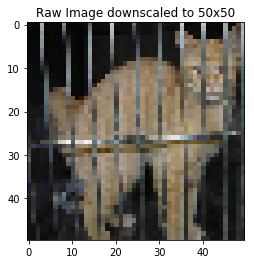

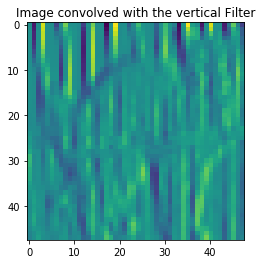

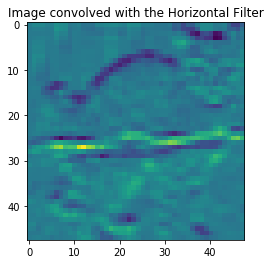

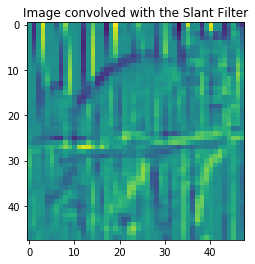

In [136]:
filterWidth = len(vertFilter)
filterHeight = len(vertFilter)
imageWidth = 50
imageHeight = 50

image = img_to_array(load_img('cat.15.jpg',target_size=(imageWidth,imageHeight)))
testImage = load_img('cat.15.jpg',target_size=(imageWidth,imageHeight))
plt.imshow(image)

convolvedVertImage = []
convolvedHorizImage = []
convolvedSlantImage = []
for j in range(imageHeight-filterHeight+1): # sweeping x
    vertTemp = []
    horizTemp = []
    slantTemp = []
    for i in range(imageWidth-filterWidth+1): # sweeping y
        vert = 0
        horiz = 0
        slant = 0
        for k in range(3): # sweeping channels
            vert += np.sum(vertFilter*image[j:(filterHeight+j),i:(filterWidth+i),k])
            horiz += np.sum(horizontalFilter*image[j:(filterHeight+j),i:(filterWidth+i),k])
            slant += np.sum(slantFilter*image[j:(filterHeight+j),i:(filterWidth+i),k])
            
        vertTemp.append(vert)
        horizTemp.append(horiz)
        slantTemp.append(slant)
        
    convolvedVertImage.append(np.array(vertTemp))
    convolvedHorizImage.append(np.array(horizTemp))
    convolvedSlantImage.append(np.array(slantTemp))
        
convolvedVertImage = np.array(convolvedVertImage)
convolvedHorizImage = np.array(convolvedHorizImage)
convolvedSlantImage = np.array(convolvedSlantImage)

# Showing the effects of the convolutions
plt.figure(1)
plt.imshow(testImage)
plt.title('Raw Image downscaled to 50x50')

plt.figure(2)
plt.imshow(convolvedVertImage)
plt.title('Image convolved with the vertical Filter')

plt.figure(3)
plt.imshow(convolvedHorizImage)
plt.title('Image convolved with the Horizontal Filter')

plt.figure(4)
plt.imshow(convolvedSlantImage)
plt.title('Image convolved with the Slant Filter')

<b> Question 2b </b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A Gaussian Blur if you do not consider the 3 sigma cutoff that is discussed in the wikipedia article looks as follows:

 [[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


Text(0.5,1,'Image post Gaussian Blur')

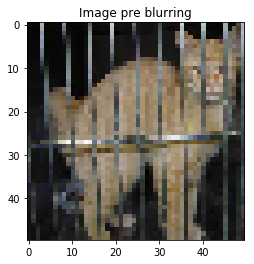

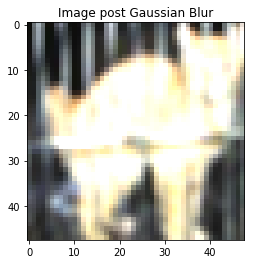

In [171]:
L = 3
sigma = 1
gaussianBlur = []

def gaussian(x,y):
    return 1/(2*np.pi*sigma**2)*np.exp(-(x**2+y**2)/(2*sigma**2))

for j in -(np.arange(L)-int(L/2)): #  Making the 3x3 gaussian
    temp = []
    for i in (np.arange(L)-int(L/2)):
        temp.append(gaussian(i,j))
    gaussianBlur.append(np.array(temp))
    
gaussianBlur = np.array(gaussianBlur)
print('A Gaussian Blur if you do not consider the 3 sigma cutoff that is discussed in the wikipedia article looks as follows:')
print('\n',gaussianBlur)

convolvedGaussian = []
#  convolving the image with the gaussian blur
for k in range(L):
    Gaussian = []
    for j in range(imageHeight-filterHeight+1):
        gaussianTemp = []

        for i in range(imageWidth-filterWidth+1):
            gaussian = np.sum(gaussianBlur*image[j:(filterHeight+j),i:(filterWidth+i),k])

            gaussianTemp.append(gaussian)

        Gaussian.append(np.array(gaussianTemp))
    convolvedGaussian.append(np.array(Gaussian))
    
convolvedGaussian = np.array(convolvedGaussian)
convolvedGaussian = np.swapaxes(convolvedGaussian,0,2)
convolvedGaussian = np.swapaxes(convolvedGaussian,0,1)

image2 = imread('cat.15.jpg')
plt.figure()
plt.imshow(((image-np.min(image))/(np.max(image)-np.min(image))))
plt.title('Image pre blurring')

plt.figure()
plt.imshow(((convolvedGaussian-np.min(image))/(np.max(convolvedGaussian)-np.mean(convolvedGaussian))))
plt.title('Image post Gaussian Blur')


<b> Gaussian blur is used to reduce image noise and reduce detail. It also effectively acts as a low pass filter. </b>

<b> Question 3a </b>

<b> i. </b> Translation, the numbers in the Mnist data set will remain the same numbers e.g. have the same features, but will be located differently yielding more images to learn from. Zooming in or Scaling would be a second, as variance between how large the numbers is something you want to proof your algorithm against.

<b> ii. </b>
For Dog vs Cat images, Scaling. Scaling is important because a picture of a girl holding a cat needs to be classified as a cat in this case, but the cat may be a very small aspect of the original image, and so the algorithm needs to be invariant to the size of the cat.
A second data augmentation useful for Dog vs Cat images could be horizontal/vertical flipping. A image that is flipped will still have the same features as an unflipped image, giving us more data to learn from, and proofing our algorithm against cats that are upside down, like hanging from a ceiling light for example.


<b> Question 3b </b>


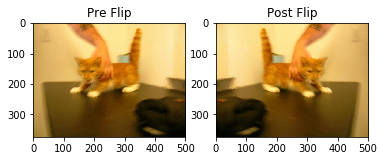

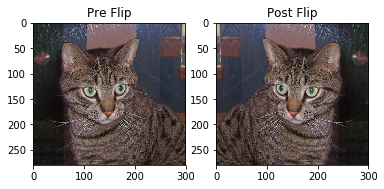

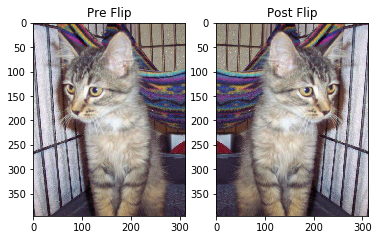

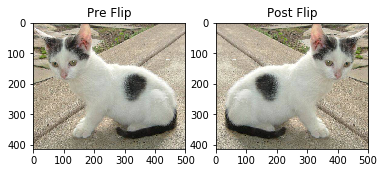

In [7]:
for i in range(4):
    fileName = 'cat.%d.jpg'%(i)
    image = imread(fileName)
    plt.figure(i)
    plt.subplot(1,2,1)
    ax = plt.gca()
    ax.set_title('Pre Flip')
    plt.imshow(image)
    plt.subplot(1,2,2)
    ax = plt.gca()
    ax.set_title('Post Flip')
    plt.imshow(np.fliplr(image))
# left right flips

<b> Question 4a </b>

In [107]:
### Preparing the training data
tstart = t.time()
cwd = os.getcwd()
trainDirectory = os.path.join(cwd,'train')
labels = []
files = os.listdir(trainDirectory)

#  We want 50 pixel x 50 pixel images
width = 50
height = 50
data = []
for name in files:  #  Label all of the images
    discriminator = name.split('.')[0]
    data.append(img_to_array(load_img(os.path.join(trainDirectory,name),target_size=(width,height)))) # loading images
    if discriminator == 'dog': # if file name had dog label 1
        labels.append(1)
    else:
        labels.append(0)


data = np.array(data)
train_data, test_data , train_labels , test_labels = train_test_split(data, labels, test_size=0.2, random_state = 42)
tEnd = t.time()
print((tEnd-tstart)/60)

2.774302407105764


In [112]:
channels = 3
activators = ['relu','tanh','linear','softmax','sigmoid']
activatorScores = []

tstart = t.time() # make our CNN and sweep all the activators
for activator in activators:
    classifier = Sequential()

    classifier.add(Conv2D(64,(3,3),input_shape = (width,height,channels),activation=activator))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Flatten())
    classifier.add(Dense(64,activation=activator))
    classifier.add(Dense(units = 1,activation='sigmoid'))

    classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

    history = classifier.fit(train_data,train_labels, verbose=0 , epochs=10 , validation_data=(test_data,test_labels))
    activatorScores.append(history.history['val_acc'][-1])

activatorScores = np.array(activatorScores)
tEnd = t.time()
print((tEnd-tstart)/60)

13.404792102177938


In [113]:
initializers = ['Ones','VarianceScaling','RandomNormal','Zeros','RandomUniform']
initializerScores = []

tstart = t.time() # make CNN but sweep initializers
for initializer in initializers:
    classifier = Sequential()

    classifier.add(Conv2D(64,(3,3),input_shape = (width,height,channels),activation='relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Flatten())
    classifier.add(Dense(64,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
    classifier.add(Dense(units = 1,activation='sigmoid'))

    classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

    history = classifier.fit(train_data , train_labels , verbose=0 , epochs=10 , validation_data=(test_data,test_labels))
    initializerScores.append(history.history['val_acc'][-1])

initializerScores = np.array(initializerScores)
tEnd = t.time()
print((tEnd-tstart)/60)

11.927638590335846


In [115]:
numberLayers = [1,2,4,8,16]
numberLayersScores = []

tstart = t.time() # make CNN and sweep number of fully connected layers
for numLayers in numberLayers:
    classifier = Sequential()
    

    classifier.add(Conv2D(64,(3,3),input_shape = (width,height,channels),activation='relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    
    classifier.add(Flatten())
    
    for i in range(numLayers):
        classifier.add(Dense(64,activation='relu'))
        
    classifier.add(Dense(units = 1,activation='sigmoid'))

    classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

    history = classifier.fit(train_data , train_labels , verbose=0 , epochs=10 , validation_data=(test_data,test_labels))
    numberLayersScores.append(history.history['val_acc'][-1])

tEnd = t.time()
print((tEnd-tstart)/60)

12.425335518519084


In [117]:
optimizers = ['SGD','RMSprop','Adam']
optimizerScores = []
accConvergence = []
valAccConvergence = []

tstart = t.time() # sweep the optimizers
for optimizer in optimizers:
    classifier = Sequential()

    classifier.add(Conv2D(64,(3,3),input_shape = (width,height,channels),activation='relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D(pool_size=(2,2)))

    classifier.add(Flatten())
    classifier.add(Dense(64,activation='relu'))
    classifier.add(Dense(units = 1,activation='sigmoid'))

    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    history = classifier.fit(train_data , train_labels , verbose=0 , epochs=25 , validation_data=(test_data,test_labels))
    accConvergence.append(history.history['acc'])
    valAccConvergence.append(history.history['val_acc'])
    optimizerScores.append(history.history['val_acc'][-1])

optimizerScores = np.array(optimizerScores)
tEnd = t.time()
print((tEnd-tstart)/60)

16.801121366024017


In [2]:
print('For the optimizers',optimizers,' the respective validation accuracies are',optimizerScores,' yielding SGD as the best optimizer')

print('\nFor the activators',activators,' the respective validation accuracies are',activatorScores,' yielding sigmoid as the best activator')

print('\nFor the initializers',initializers,' the respective validation accuracies are',initializerScores,' yielding RandomNormal as the best weight initialization')

print('\nFor the number of layers',numberLayers,' the respective validation accuracies are',numberLayersScores,' yielding 16 as the best number of layers')

For the optimizers ['SGD', 'RMSprop', 'Adam']  the respective validation accuracies are [0.7606, 0.7132, 0.7174]  yielding SGD as the best optimizer

For the activators ['relu', 'tanh', 'linear', 'softmax', 'sigmoid']  the respective validation accuracies are [0.6516, 0.6744, 0.69, 0.6168, 0.7106]  yielding sigmoid as the best activator

For the initializers ['Ones', 'VarianceScaling', 'RandomNormal', 'Zeros', 'RandomUniform']  the respective validation accuracies are [0.5088, 0.7086, 0.7172, 0.503, 0.6688]  yielding RandomNormal as the best weight initialization

For the number of layers [1, 2, 4, 8, 16]  the respective validation accuracies are [0.7176, 0.7072, 0.7234, 0.7152, 0.734]  yielding 16 as the best number of layers


Text(0,0.5,'Accuracy')

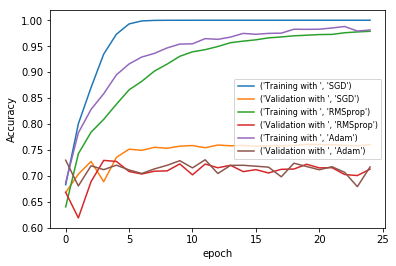

In [119]:
numEpochs = len(valAccConvergence[0])
for i in range(len(optimizers)):
    plt.figure(1)
    plt.plot(np.arange(numEpochs),accConvergence[i],label=('Training with ',optimizers[i]))
    plt.plot(np.arange(numEpochs),valAccConvergence[i],label=('Validation with ',optimizers[i]))
plt.legend(loc=7,prop={'size': 8})
plt.xlabel('epoch')
plt.ylabel('Accuracy') # show how the different optimizers perform for training and validation

SGD clearly performs the best as an optimizer when looking at both training accuracy and validation accuracy. It converges faster than RMSprop and Adam in both cases and also yields a better overall accuracy on both training and validation.

<b> Question 4c </b>

In this question I learned that in general the final Dense layer needs to have some sort of activation function that is clear for binary classification, e.g. tanh or a sigmoid, otherwise the accuracy plummets. The other activation functions for different layers can vary and accuracies tend to remain okay aslong as the final activation function remains constant. The best activation function appeared to be relu.

I found that a small amount of layers yielded a good result, but increasing layers would increase this accuracy more and more as more layers were added.

Batch normalization is a layer that takes the previous layers activations and normalizes them to have near 0 mean , and 1 standard deviation which improves classifier accuracy. This is similar to what we had implemented in previous assignments with linear regression for example to improve classifier performance.

Similar to what we had done previously for our Sklearn classifier, we flatten the data before inputting the data into our Dense layers as this makes processing faster. 



<b> Question 5 </b>

In [120]:
cwd = os.getcwd()
trainDirectory = os.path.join(cwd,'trainKeras\\train')
valDirectory = os.path.join(cwd,'trainkeras\\validation')

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(trainDirectory,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(valDirectory,
                                                         target_size=(224,224),
                                                         color_mode='rgb',
                                                         class_mode='binary',
                                                         batch_size=32,
                                                         shuffle=True)
# Make data and validation data generators

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [121]:
channels = 3
MobileNetModel = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3)) # Transfer from MobileNet

transferClassifier = MobileNetModel.output


transferClassifier = MaxPooling2D(pool_size=(2,2))(transferClassifier) # add pooling layer
transferClassifier = Flatten()(transferClassifier) #  Flatten the output
transferClassifier = Dense(64,activation='relu')(transferClassifier) #  Add a fully connected layer
transferClassifer = Dropout(0.5)(transferClassifier) # drop weight values
transferClassifier = Dense(32,activation='relu')(transferClassifier) #  Add another smaller fully connected layer
predictions = Dense(units = 1,activation='sigmoid')(transferClassifier) # Classifying layer


transferedModel = Model(inputs=MobileNetModel.input,outputs=predictions) # stitch our layers with the mobilenet model

for layers in MobileNetModel.layers: # make the mobilenet layers not trainable since we know they're already good
    layers.trainable=False

    
transferedModel.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['accuracy']) # compile the model


In [122]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = validation_generator.n//validation_generator.batch_size
# fit our model
transferedModel.fit_generator(generator=train_generator,steps_per_epoch = step_size_train , epochs=10 , validation_data=validation_generator,validation_steps = step_size_val)

Epoch 1/10
625/625 [==============================] - 229s 366ms/step - loss: 0.1386 - acc: 0.9541 - val_loss: 0.0747 - val_acc: 0.9722
Epoch 2/10
625/625 [==============================] - 227s 363ms/step - loss: 0.0642 - acc: 0.9746 - val_loss: 0.0802 - val_acc: 0.9718
Epoch 3/10
625/625 [==============================] - 224s 358ms/step - loss: 0.0650 - acc: 0.9758 - val_loss: 0.0643 - val_acc: 0.9771
Epoch 4/10
625/625 [==============================] - 202s 323ms/step - loss: 0.0506 - acc: 0.9805 - val_loss: 0.0628 - val_acc: 0.9767
Epoch 5/10
625/625 [==============================] - 215s 344ms/step - loss: 0.0485 - acc: 0.9813 - val_loss: 0.0739 - val_acc: 0.9732
Epoch 6/10
625/625 [==============================] - 220s 352ms/step - loss: 0.0387 - acc: 0.9844 - val_loss: 0.0704 - val_acc: 0.9775
Epoch 7/10
625/625 [==============================] - 217s 347ms/step - loss: 0.0318 - acc: 0.9882 - val_loss: 0.0663 - val_acc: 0.9805
Epoch 8/10
625/625 [============================